    Project : SMS Spam Detection
    Creator : Sanket Kumar Singh
    Connect : https://linktree.com/imsanketsingh

In [1]:
import numpy as np
import pandas as pd

In [2]:
df= pd.read_csv('spam.csv', encoding = "ISO-8859-1")   #since the file wasn't UTF-8 encoded

In [3]:
# ham means not spam

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# since the last 3 cols don't have significant data, we should drop them
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
#renaming the columns v1 and v2

In [8]:
df.rename(columns={'v1':'category', 'v2':'smsTxt'}, inplace=True)

In [9]:
# checking missing values present if any

df.isnull().sum()

category    0
smsTxt      0
dtype: int64

In [10]:
# hence no missing values present

In [11]:
# checking for duplicates

df.duplicated().sum()

403

In [12]:
# omg there are 403 duplicate values
# No problem let's remove them

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
# now let's convert the category column elements into numbers for futher processing
# for this we ll use the label encoder from sklearn library

In [15]:
from sklearn.preprocessing import LabelEncoder
myEncoder= LabelEncoder()

In [16]:
df.head()

,category,smsTxt
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df['category']= myEncoder.fit_transform(df['category'])

In [18]:
df.head()

,category,smsTxt
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
# now lets move to the analysis part

In [20]:
# let's analyse the percentage of ham and spam in the dataset with a pie chart.

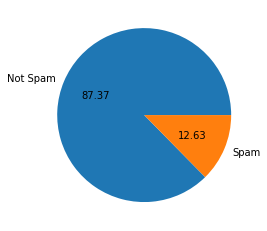

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['category'].value_counts(), labels=['Not Spam', 'Spam'], autopct="%0.2f")
plt.show()

In [22]:
# Hence 87.37% of the sms are ham while 12.63% of the sms are spam

In [23]:
# Now we will make a count of characters, words and sentence for each sms and we will store them in seperate columns

In [24]:
# for count of characters
df['numOfChars']= df['smsTxt'].apply(len)
df.head()

,category,smsTxt,numOfChars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
# for count of words
# for this we ll use python's nltk library and use the method word_tokenize to get the words from the smsTxt
import nltk

df['numOfWords']= df['smsTxt'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,category,smsTxt,numOfChars,numOfWords
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
# for count of sentences
df['numOfSentences']= df['smsTxt'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,category,smsTxt,numOfChars,numOfWords,numOfSentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
# now to analyse the new three columns we ll use describe method to get more info about them
df[['numOfChars','numOfWords','numOfSentences']].describe()

,numOfChars,numOfWords,numOfSentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [28]:
# let's do the same for ham sms
df[df['category']==0][['numOfChars','numOfWords','numOfSentences']].describe()

,numOfChars,numOfWords,numOfSentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [29]:
# And for the spam sms
df[df['category']==1][['numOfChars','numOfWords','numOfSentences']].describe()

,numOfChars,numOfWords,numOfSentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


<AxesSubplot:xlabel='numOfChars', ylabel='Count'>

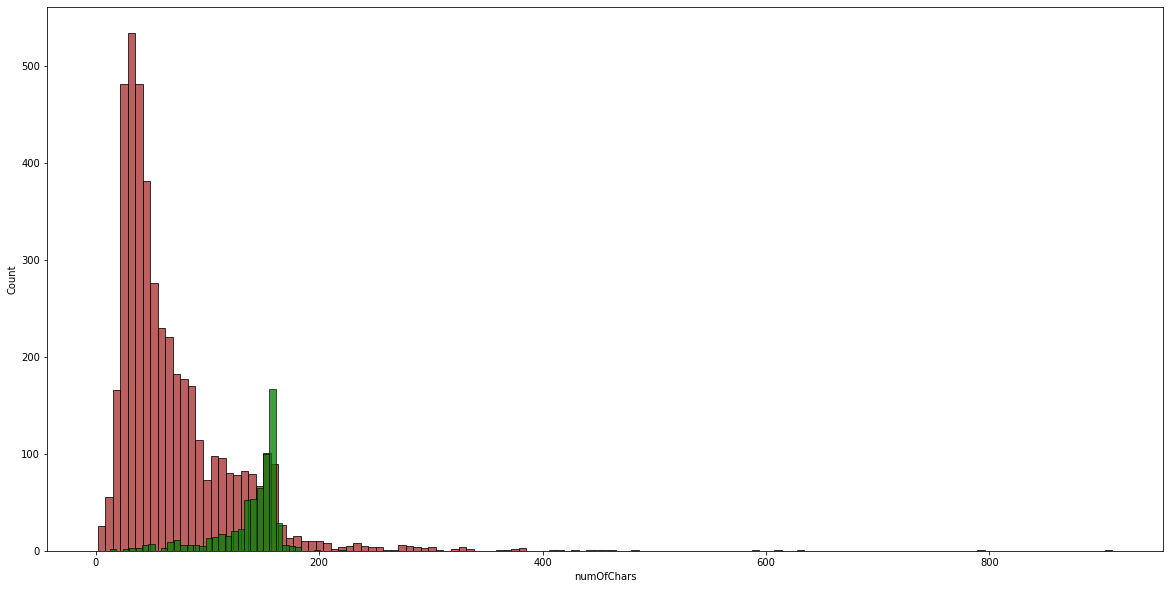

In [30]:
# here we see that the ham sms have a very high count of characters/words/sentences

# To visualize better lets plot a histogram of character counts
# For this we ll be needing seaborn library

import seaborn as sns
plt.figure(figsize=(20,10))

sns.histplot(df[df['category']==0]['numOfChars'], color= 'brown')
sns.histplot(df[df['category']==1]['numOfChars'], color= 'green')


<AxesSubplot:xlabel='numOfWords', ylabel='Count'>

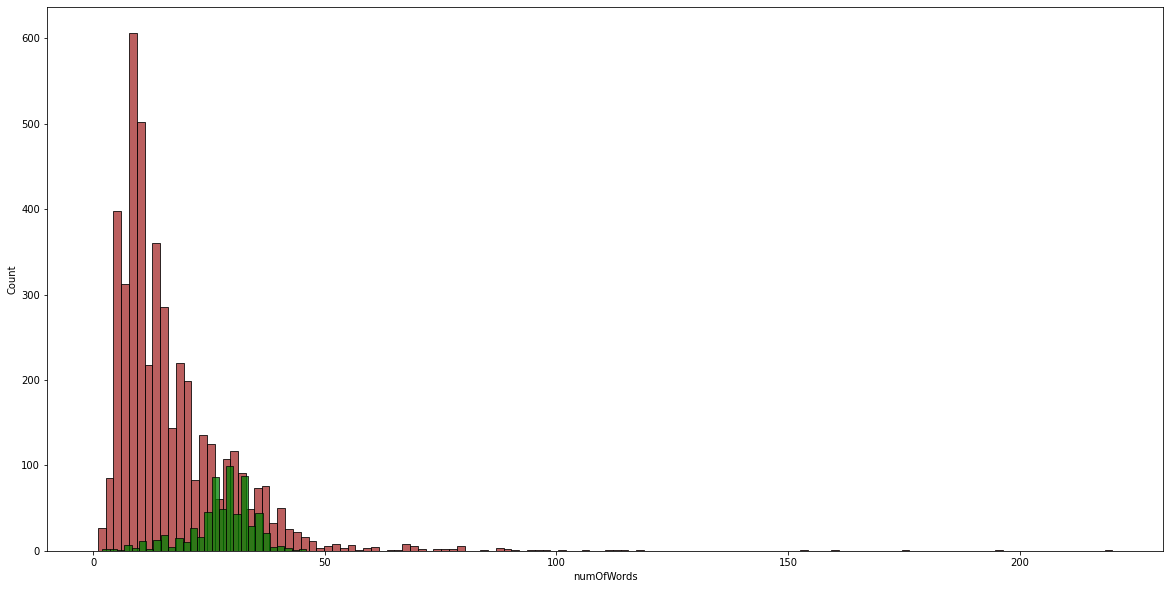

In [31]:
# similarly for other two columns
plt.figure(figsize=(20,10))

sns.histplot(df[df['category']==0]['numOfWords'], color= 'brown')
sns.histplot(df[df['category']==1]['numOfWords'], color= 'green')

<AxesSubplot:xlabel='numOfSentences', ylabel='Count'>

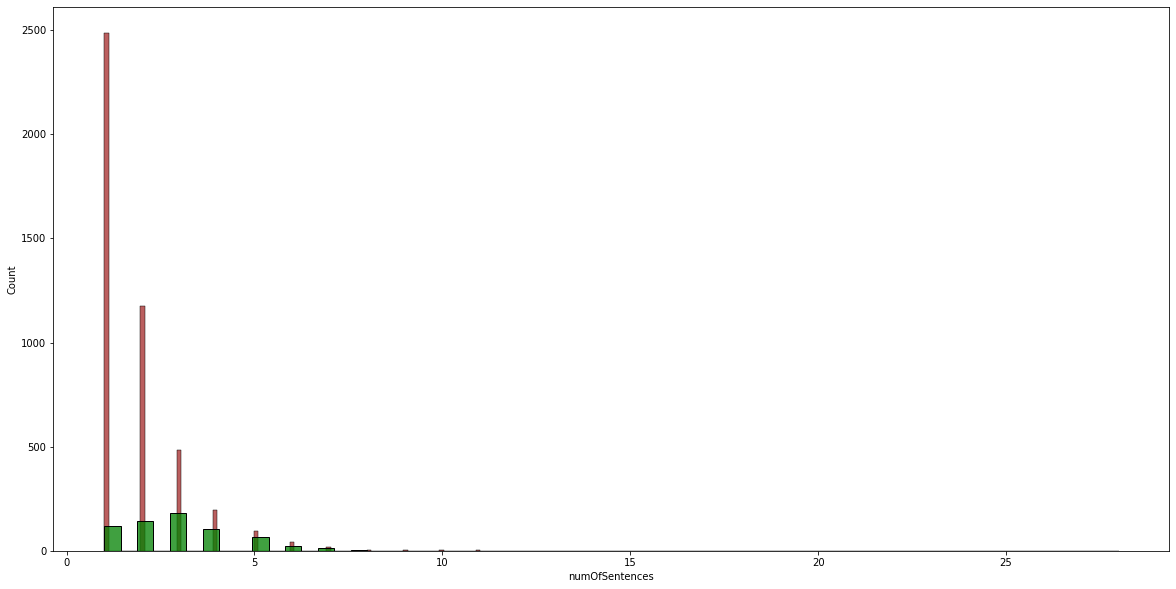

In [32]:
plt.figure(figsize=(20,10))

sns.histplot(df[df['category']==0]['numOfSentences'], color= 'brown')
sns.histplot(df[df['category']==1]['numOfSentences'], color= 'green')

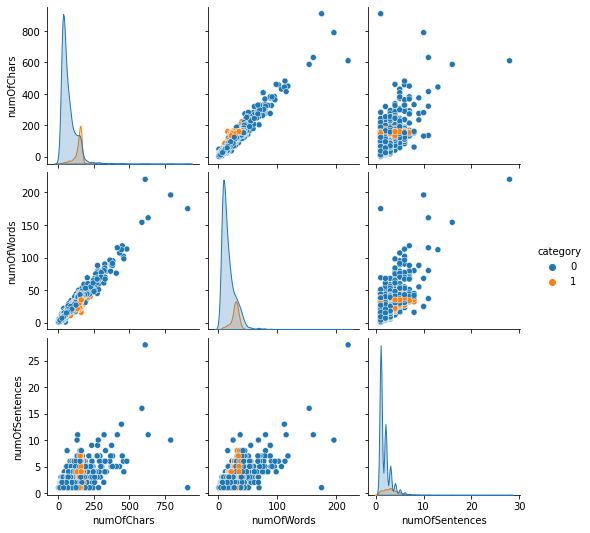

In [33]:
# Now to get the relation between number of characters, words, sentences we ll create a pairplot
sns.pairplot(df, hue='category')

In [34]:
# The info we got from these plots are:
#    1. Spam sms are on average way more longer than the Ham sms
#    2. There is a close to linear relation between the num of characters, words, sentences
#    2. There are some outliers as well (there are sms having characters near to 400 but are Ham sms)

<AxesSubplot:>

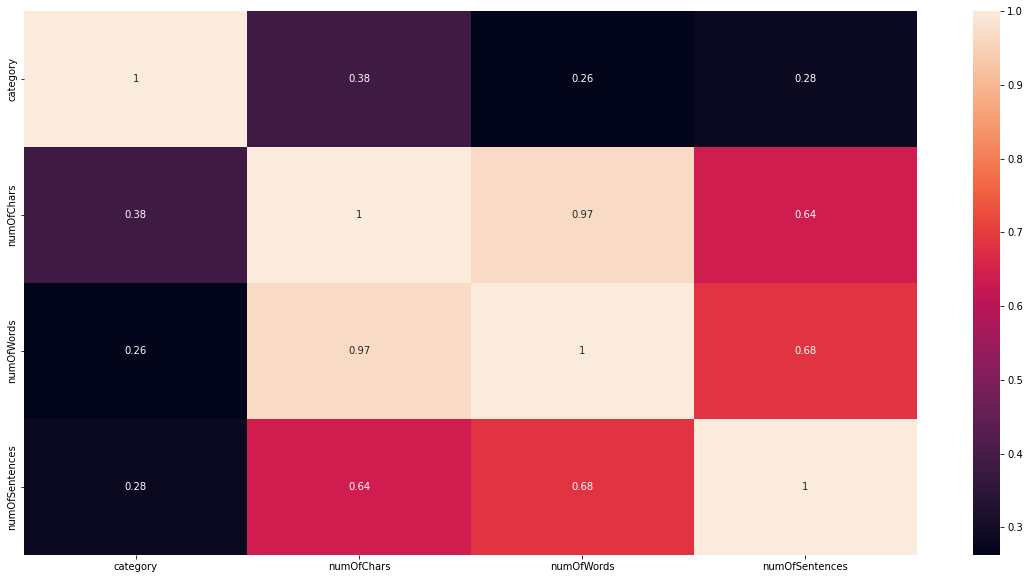

In [35]:
# for correlation between the various features and the label we will use a heap map

plt.figure(figsize=(20,10))

sns.heatmap(df.corr(), annot=True)

In [36]:
# till now we haven't get the sufficient info to work on our model
# so now we ll do data pre processing
# lets create a function that will convert the sms into a more informative piece of data

In [37]:
def transform_smsTxt(text):
    text= text.lower()  # changes everything in smallcase to avoid duplication/misclassification
    text= nltk.word_tokenize(text)  # to make a list of words of the text
    #now text is a list
    y= []
    
    for i in text:   # to remove the special characters beacuse they don't carry much info about the sms being span or not
        if(i.isalnum()):
            y.append(i)
    # now we ll remove the stop words (the words that doesn't make sense but used in sentence formation(e.g are, is, has, etc.))
    # check stopwords here
#     from nltk.corpus import stopwords
#     stopwords.words('english')
    
    # similarly we wanna remove punctuations also
    # check punctuations here
#     import string 
#     string.punctuation
    
    from nltk.corpus import stopwords
    import string
    
    # Now we will do stemming i.e. we ll convert the words that have same sense(for e.g. walk, walked, walks, walking) into their root word
    from nltk.stem.porter import PorterStemmer
    pts = PorterStemmer()
    
    text=y.copy()
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y.copy()
    y.clear()
    for i in text:
        y.append(pts.stem(i))
    
    
    return " ".join(y) # to finally convert into string

In [38]:
# A demo of the above function
transform_smsTxt("Hey! how are you? Hope everything's good. call me later")

'hey hope everyth good call later'

In [39]:
#now we ll apply this function over our dataset
df['newTxt']= df['smsTxt'].apply(transform_smsTxt)
df.head()

,category,smsTxt,numOfChars,numOfWords,numOfSentences,newTxt
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [40]:
# Now we are good to go for model building
# For this data set we ll use naive bayes classifier as it's so far the best classification algo for text data
# Also, we want the precision to be as high as possible and the false positives as less as possible because
# we certainly don't want a Ham sms to be classified as a Spam one, because that ll put people in trouble

In [41]:
# Before working on model we first have to convert our data in some numerical form so that our model can work on them
# For this we ll vectorize our data using TfidfVectorizer method
# This will create a matrix (sms vs words) and each index will have the count of the current word in the current sms

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer(max_features=3000)
X= tfidf.fit_transform(df['newTxt']).toarray()
print(X.shape)
X

(5169, 3000)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [43]:
# x will work as input
# y will work as output
y= df['category'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=31, train_size=0.75)

In [45]:
# since there are three types of naive bayes classifier we ll test each one of the and then select the best one
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
gnb= GaussianNB()
mnb= MultinomialNB();
bnb= BernoulliNB();

In [46]:
gnb.fit(X_train, y_train)
mnb.fit(X_train, y_train)
bnb.fit(X_train, y_train)

BernoulliNB()

In [47]:
from sklearn.metrics import accuracy_score, precision_score
y_pred1= gnb.predict(X_test)
y_pred2= mnb.predict(X_test)
y_pred3= bnb.predict(X_test)

print("The Accuracy for gnb is  : ", accuracy_score(y_test, y_pred1))
print("The Precision for gnb is : ", precision_score(y_test, y_pred1), end='\n\n')
print("The Accuracy for mnb is  : ", accuracy_score(y_test, y_pred2))
print("The Precision for mnb is : ", precision_score(y_test, y_pred2), end='\n\n')
print("The Accuracy for bnb is  : ", accuracy_score(y_test, y_pred3))
print("The Precision for bnb is : ", precision_score(y_test, y_pred3))

The Accuracy for gnb is  :  0.8762567672080434
The Precision for gnb is :  0.5072992700729927

The Accuracy for mnb is  :  0.9737045630317092
The Precision for mnb is :  1.0

The Accuracy for bnb is  :  0.9837587006960556
The Precision for bnb is :  1.0


In [48]:
# Great!!!  The mnb has precision score of 1 which means the model's output has zero false positives.
# It didn't classify even a single Ham as a Spam.
# The accuracy is also fair enough
# Hence we ll go with mnb

In [49]:
# Now to save our model for future we can use pickle or joblib
# Here I ll use pickle
import pickle

pickle.dump(mnb,open('model.pkl', 'wb'))

# We also need to save our vectorizer because that will be needed to process the input text after the text formatting
pickle.dump(tfidf,open('vectorizer.pkl', 'wb'))